# Problem Statement
## Bike Sharing System
- A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. The company wants to know:

    - Which variables are significant in predicting the demand for shared bikes.
    - How well those variables describe the bike demands
## Business Goal
- The goal is to design a mulitple linear regression model about the demand for shared bikes with the available independent variables. This data will be used by the management to understand how exactly the demands vary with different features. Also this model will provide a good way for the management to understand the demand dynamics of the market.

## Data Inspection

In [1]:
# Loading necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading the dataset.
df = pd.read_csv("day.csv")
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
# Checking the shape of the dataset.
df.shape

(730, 16)

In [4]:
# Checking the the data in the dataframe.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
# Checking the statistical summary of dataset.
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
# Checking for null values.
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

## Visualising the data

<Figure size 1440x1080 with 0 Axes>

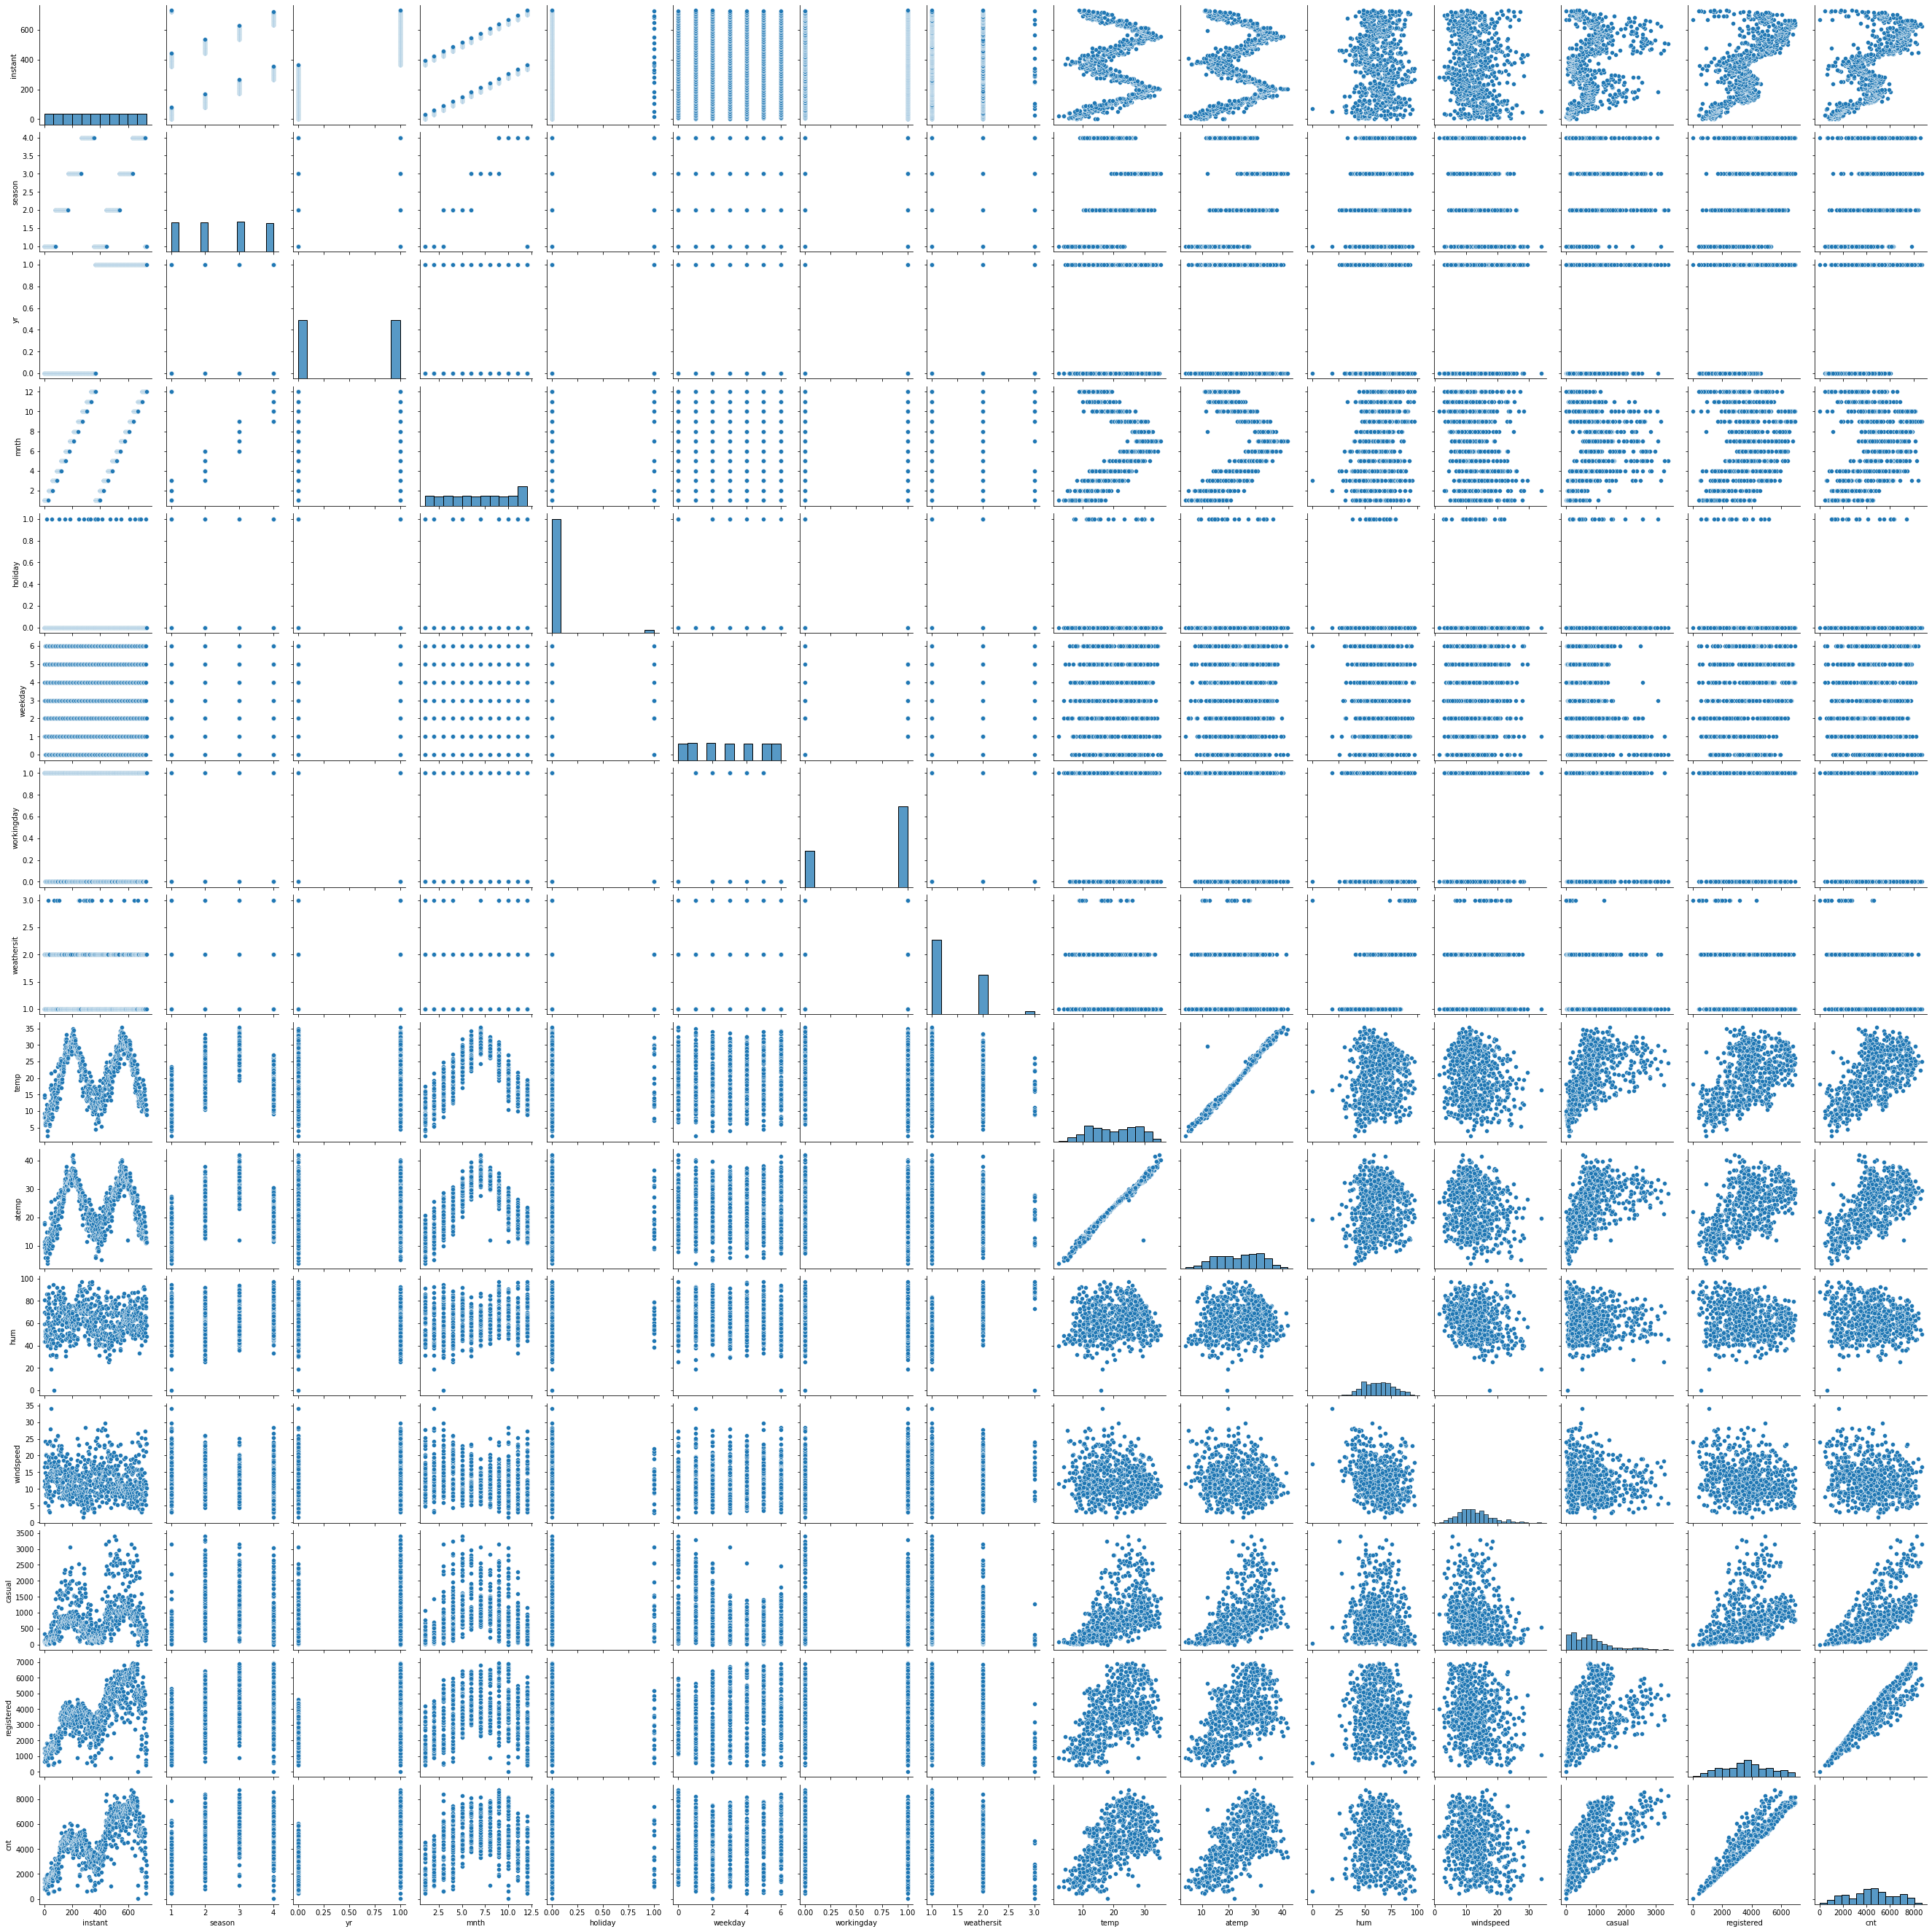

In [7]:
# Visualise the linear relationships among variables.
plt.figure(figsize=(20,15))
sns.pairplot(data=df)
plt.show()

- Some variables are having linear behaviour w.r.t cnt (target variable).
- Other interersting behaviour are as per below chart.

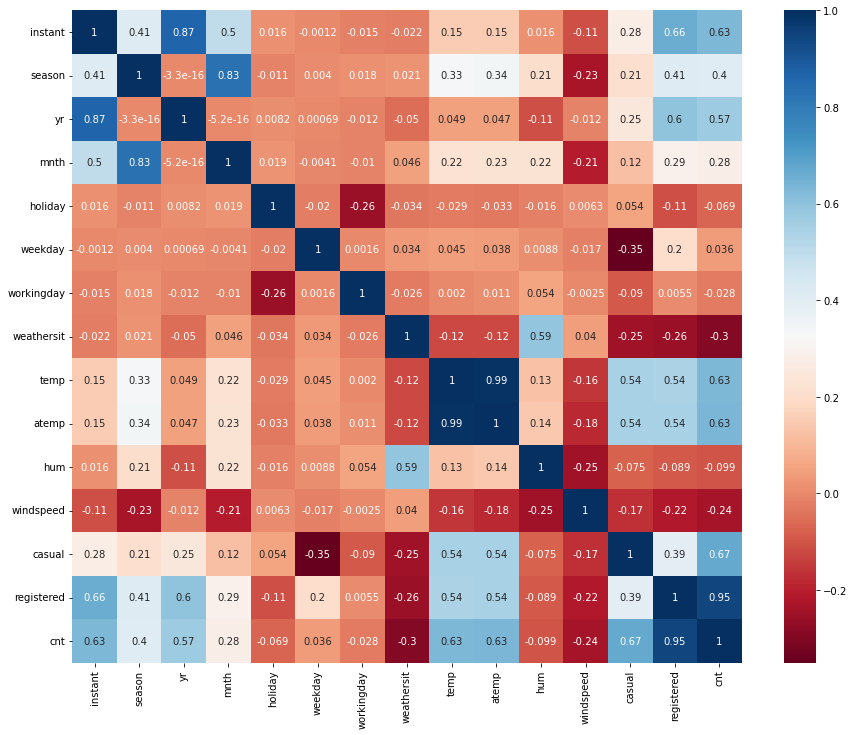

In [8]:
# Visualise Correlation matrix using heat map.

plt.figure(figsize=(15,12))
sns.heatmap(data=df.corr(), annot=True, cmap="RdBu")
plt.show()

### Fixing Rows and Columns - Multiple Columns are not useful for Data analysis and can be removed.

In [9]:
## instant - it's just a record index and doesn't provide any value, we already have that info by shape() and info() functions.
## dteday - the date can also be explained by year, mnth, weekday columns so we can drop it and moveover it's not a time series
##           data so date is not important.

df = df.drop('instant', axis=1)
df = df.drop('dteday', axis=1)

## looking into the temp V/s atemp (feel like temp): we don't need both as temp shows air temperation outside whereas 
###        atemp (feel like temp) calculates wind or the humidity combined with the air temperature and actually how it feels 
###        like on our skin. 
### based on the pairplot and heatmap , it's clear that atemp and temp are highly correlated .
### So,one of them can be dropped . May need to drop "atemp" as feel like temperature tolerance may be different for diff people
### moreover as we are keeping Humidity and Windspeed parameters it make sense to include temp.

df = df.drop('atemp', axis=1)

## Casual and Registered V/s cnt --  Basically Casual + Registered = cnt , now looking at the pairplots of 
###        Causal and Registered V/s cnt , correlation seems to be a sum of causual V/s cnt and Regsitered V/s cnt 
###         So it's better to drop Causual and Registed as cnt is our Target Variable
df = df.drop('casual', axis=1)
df = df.drop('registered', axis=1)

In [10]:
# Checking the dataframe after dropping columns.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(3), int64(8)
memory usage: 62.9 KB


### Converting the Numerical values of season, weathersit, mnth and weekday variables to Categorical variables.

In [11]:
# season column has numbers which might indicate an order but actually it's not .
# it represents seasons as 1:spring, 2:summer, 3:fall, 4:winter
# So, it better we replace the numbers with proper strings

var = ['season']

df[var] = df[var].apply(lambda x: x.map({1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'}))
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,Spring,0,1,0,1,1,2,14.110847,80.5833,10.749882,985
1,Spring,0,1,0,2,1,2,14.902598,69.6087,16.652113,801
2,Spring,0,1,0,3,1,1,8.050924,43.7273,16.636703,1349
3,Spring,0,1,0,4,1,1,8.200000,59.0435,10.739832,1562
4,Spring,0,1,0,5,1,1,9.305237,43.6957,12.522300,1600


In [12]:
# Covnert the numerical values associated with labels to categorical string values
# 1: Clear, Few clouds, Partly cloudy, Partly cloudy ==> Clear
# 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist ==> Misty
# 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds ==> Wet
# 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog  ==> Snow

var = ['weathersit']

df[var] = df[var].apply(lambda x: x.map({1:'Clear', 2:'Misty', 3:'Wet', 4:'Snow'}))
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,Spring,0,1,0,1,1,Misty,14.110847,80.5833,10.749882,985
1,Spring,0,1,0,2,1,Misty,14.902598,69.6087,16.652113,801
2,Spring,0,1,0,3,1,Clear,8.050924,43.7273,16.636703,1349
3,Spring,0,1,0,4,1,Clear,8.200000,59.0435,10.739832,1562
4,Spring,0,1,0,5,1,Clear,9.305237,43.6957,12.522300,1600


In [13]:
# Convert the numerical values in "mnt" column to the Categorical variables
var = ['mnth']

df[var] = df[var].apply(lambda x: x.map({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep',10:'Oct', 11:'Nov', 12: 'Dec'}))
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,Spring,0,Jan,0,1,1,Misty,14.110847,80.5833,10.749882,985
1,Spring,0,Jan,0,2,1,Misty,14.902598,69.6087,16.652113,801
2,Spring,0,Jan,0,3,1,Clear,8.050924,43.7273,16.636703,1349
3,Spring,0,Jan,0,4,1,Clear,8.200000,59.0435,10.739832,1562
4,Spring,0,Jan,0,5,1,Clear,9.305237,43.6957,12.522300,1600


In [14]:
# Convert the numerical values in "weekday" column to the Categorical variables
# 0:'sun', 1:'mon', 2:'tue', 3:'wed', 4:'thu', 5:'fri', 6:'sat'

var = ['weekday']

df[var] = df[var].apply(lambda x: x.map({0:'sun', 1:'mon', 2:'tue', 3:'wed', 4:'thu', 5:'fri', 6:'sat'}))
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,Spring,0,Jan,0,mon,1,Misty,14.110847,80.5833,10.749882,985
1,Spring,0,Jan,0,tue,1,Misty,14.902598,69.6087,16.652113,801
2,Spring,0,Jan,0,wed,1,Clear,8.050924,43.7273,16.636703,1349
3,Spring,0,Jan,0,thu,1,Clear,8.200000,59.0435,10.739832,1562
4,Spring,0,Jan,0,fri,1,Clear,9.305237,43.6957,12.522300,1600


In [15]:
# Checking the info of the dataframe.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 62.9+ KB


<Figure size 1440x1080 with 0 Axes>

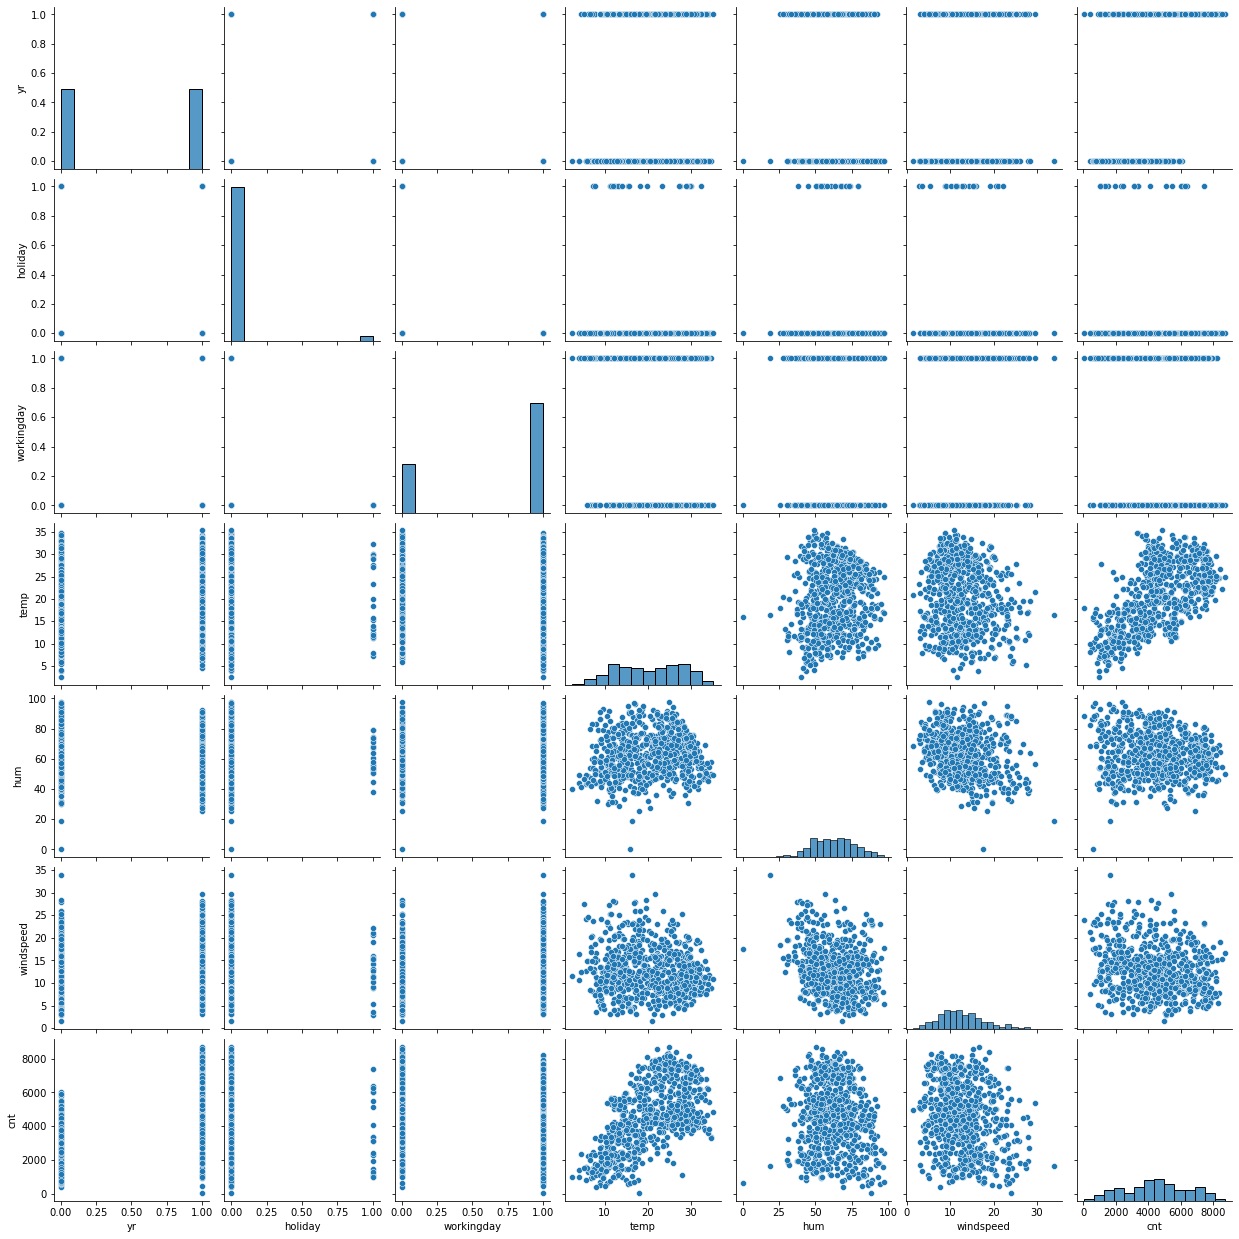

In [16]:
# Visualisation of the data to check linearity

plt.figure(figsize=(20,15))
sns.pairplot(data=df)
plt.show()

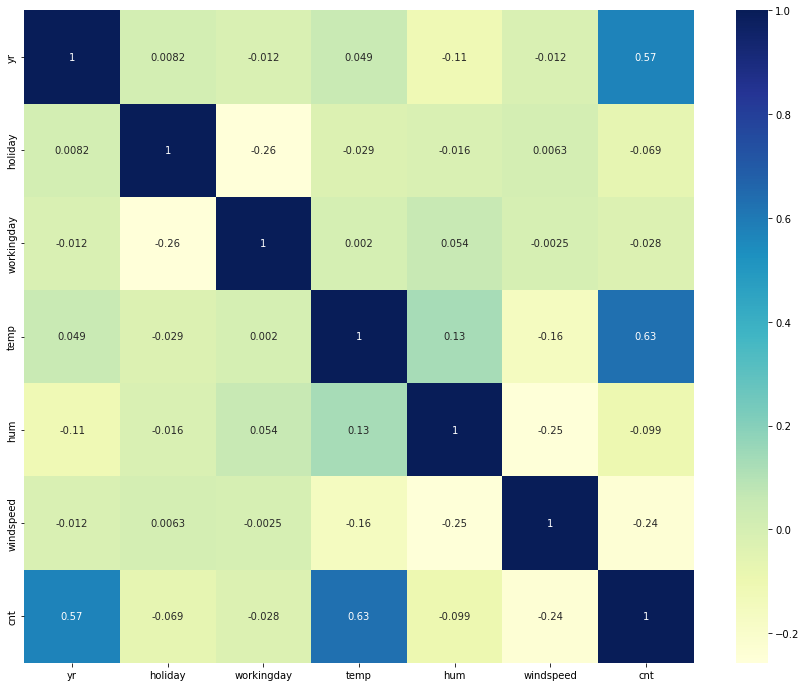

In [17]:
# Visualise Correlation using heat map

plt.figure(figsize=(15,12))
sns.heatmap(data=df.corr(), annot=True, cmap="YlGnBu")
plt.show()

- Strong correlation between temp and cnt followed by yr and cnt.

### Bivariate Analysis.

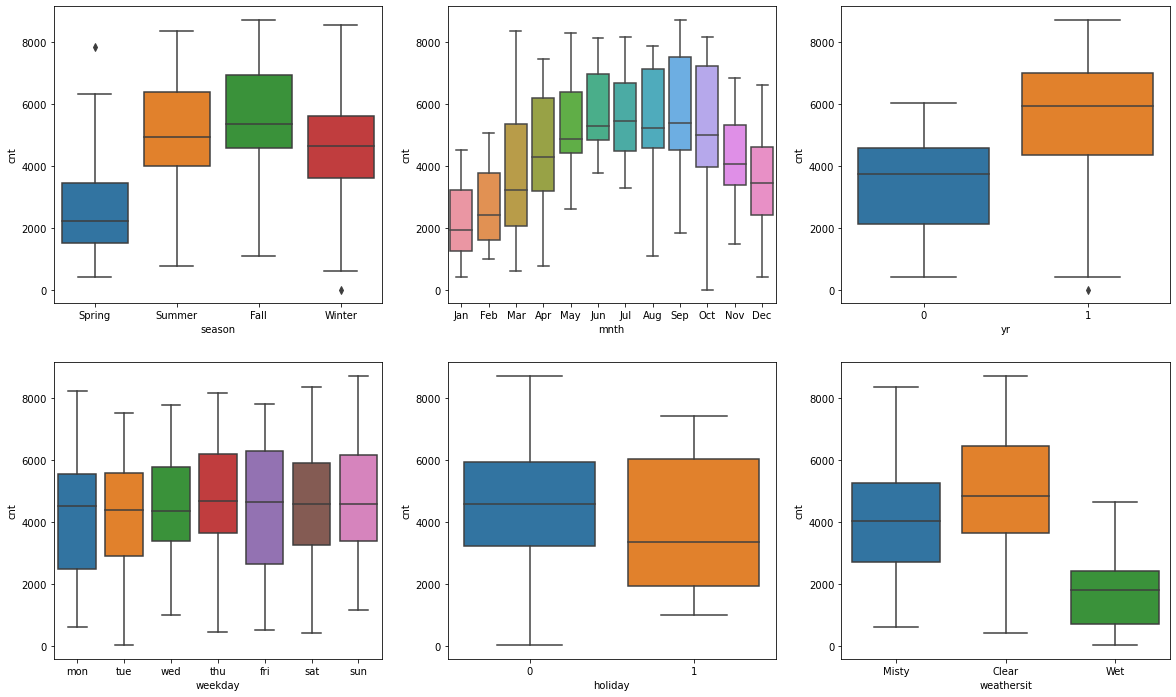

In [18]:
#Create boxplot for the categorical variables
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = df)
plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = df)
plt.subplot(2,3,3)
sns.boxplot(x = 'yr', y = 'cnt', data = df)
plt.subplot(2,3,4)
sns.boxplot(x = 'weekday', y = 'cnt', data = df)
plt.subplot(2,3,5)
sns.boxplot(x = 'holiday', y = 'cnt', data = df)
plt.subplot(2,3,6)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df)
plt.show()

### Inference for categorical variables:
    - With the above plot, few of the insights are:

- Season fall has highest demand for bike booking followed by summer and winter.
- Depending upon the weather condition the demand is more. Also the demand increases steadily from April and peaks between Jul-Sep and decreases slowly during winter.
- The demand for bike booking is increasing year over year.
- There is less demand of bike during Sunday and Monday compared to other days of the week.
- Demand for bike is more on working day compared to holiday.
- Weather determines the bike demand. So when the day is more clear, then the demand is more. Demand of bike is less during Rainy day.

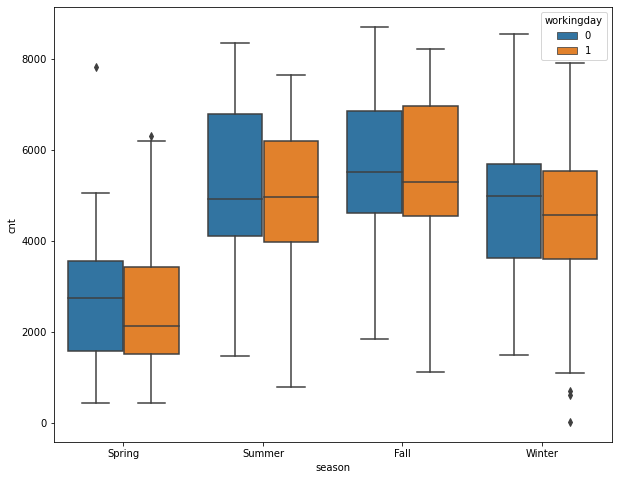

In [19]:
#Create a box plot for season and cnt with hue as workingday
plt.figure(figsize = (10, 8))
sns.boxplot(x = 'season', y = 'cnt', hue = 'workingday', data = df)
plt.show()

- Bike demand is more during fall and summer season. While in summer, demand is more on holiday and during fall, demand is more on working day.

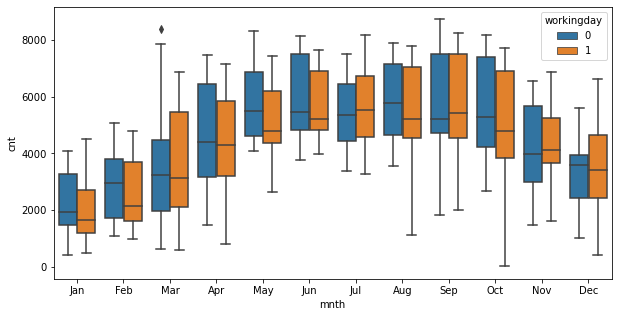

In [20]:
#Create a box plot for mnt and cnt with hue as workingday
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'mnth', y = 'cnt', hue = 'workingday', data = df)
plt.show()

- The demand for bike is more on holiday during Jun, Sep and Oct. So when it's vacation time, then the demand is more.

### Creating dummy Variables for categorical data.

In [21]:
# Create dummy Variables for season  categorical data
seasons = pd.get_dummies(df['season'], drop_first=True)
seasons

,Spring,Summer,Winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
725,1,0,0
726,1,0,0
727,1,0,0
728,1,0,0


In [22]:
# Concat the dummy variables of season - spring (100), summer (010), winter (001) and fall(000) 
# Then, Drop the season variable as dummy variables are added 

df = pd.concat([df, seasons], axis=1)
df = df.drop('season', axis=1)

df.head()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,Spring,Summer,Winter
0,0,Jan,0,mon,1,Misty,14.110847,80.5833,10.749882,985,1,0,0
1,0,Jan,0,tue,1,Misty,14.902598,69.6087,16.652113,801,1,0,0
2,0,Jan,0,wed,1,Clear,8.050924,43.7273,16.636703,1349,1,0,0
3,0,Jan,0,thu,1,Clear,8.200000,59.0435,10.739832,1562,1,0,0
4,0,Jan,0,fri,1,Clear,9.305237,43.6957,12.522300,1600,1,0,0


In [23]:
# Create dummy variables for mnth categorical data
months = pd.get_dummies(df['mnth'],drop_first=True)
months

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
725,0,1,0,0,0,0,0,0,0,0,0
726,0,1,0,0,0,0,0,0,0,0,0
727,0,1,0,0,0,0,0,0,0,0,0
728,0,1,0,0,0,0,0,0,0,0,0


In [24]:
# Concat to df dataset and then drop mnth
df = pd.concat([df, months], axis=1)
df = df.drop('mnth', axis=1)

df.head()

,yr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,Spring,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,mon,1,Misty,14.110847,80.5833,10.749882,985,1,...,0,0,1,0,0,0,0,0,0,0
1,0,0,tue,1,Misty,14.902598,69.6087,16.652113,801,1,...,0,0,1,0,0,0,0,0,0,0
2,0,0,wed,1,Clear,8.050924,43.7273,16.636703,1349,1,...,0,0,1,0,0,0,0,0,0,0
3,0,0,thu,1,Clear,8.200000,59.0435,10.739832,1562,1,...,0,0,1,0,0,0,0,0,0,0
4,0,0,fri,1,Clear,9.305237,43.6957,12.522300,1600,1,...,0,0,1,0,0,0,0,0,0,0


In [25]:
# Create dummy variables for weathersit categorical data
weathertype = pd.get_dummies(df['weathersit'])
weathertype

,Clear,Misty,Wet
0,0,1,0
1,0,1,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
725,0,1,0
726,0,1,0
727,0,1,0
728,1,0,0


In [26]:
# Concat to df dataset and then drop weathersit.
df = pd.concat([df, weathertype], axis=1)
df = df.drop('weathersit', axis=1)

df.head()

,yr,holiday,weekday,workingday,temp,hum,windspeed,cnt,Spring,Summer,...,Jul,Jun,Mar,May,Nov,Oct,Sep,Clear,Misty,Wet
0,0,0,mon,1,14.110847,80.5833,10.749882,985,1,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,tue,1,14.902598,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,wed,1,8.050924,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,thu,1,8.200000,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,fri,1,9.305237,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,1,0,0


In [27]:
# Create dummy variables for weekday categorical data
days = pd.get_dummies(df['weekday'], drop_first = True)
days

,mon,sat,sun,thu,tue,wed
0,1,0,0,0,0,0
1,0,0,0,0,1,0
2,0,0,0,0,0,1
3,0,0,0,1,0,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
725,0,0,0,0,0,0
726,0,1,0,0,0,0
727,0,0,1,0,0,0
728,1,0,0,0,0,0


In [28]:
# Concat to df dataset and then drop weekdays
df = pd.concat([df, days], axis=1)
df = df.drop('weekday', axis=1)

df.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Spring,Summer,Winter,...,Sep,Clear,Misty,Wet,mon,sat,sun,thu,tue,wed
0,0,0,1,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,1,0,1,0,0,0,0,0
1,0,0,1,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,1,0,0,0,0,0,1,0
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,1,0,0,0,0,0,0,0,1
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,1,0,0,0,0,0,1,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,1,0,0,0,0,0,0,0,0


In [29]:
# Checking the shape of the dataframe
df.shape

(730, 30)

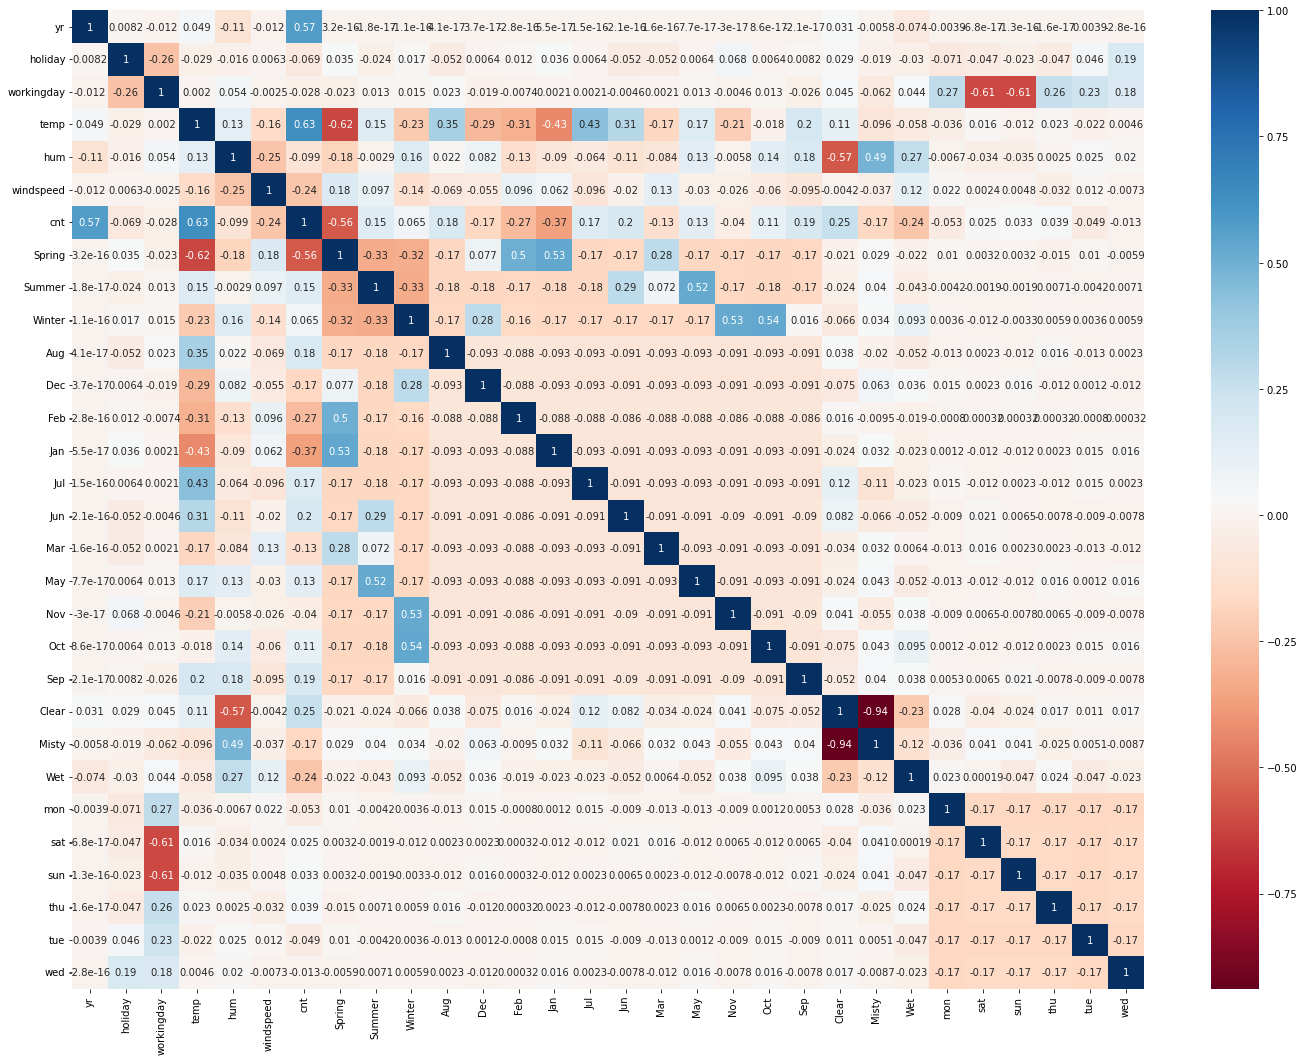

In [30]:
# Visualising correlation of variables in heatmap
plt.figure(figsize=(24,18))
sns.heatmap(data=df.corr(), annot=True, cmap="RdBu")
plt.show()

## Model Building
- Let us the build the mulitple linear regression model using RFE. So before building the model, let us split the data into train and test data.

In [31]:
# Importing library for data splitting into test and train.
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, train_size=0.7,test_size=0.3,random_state=100)

In [32]:
#Check the shapes
print(f'The shape of train dataframe:', df_train.shape)
print(f'The shape of test dataframe:' ,df_test.shape)

The shape of train dataframe: (510, 30)
The shape of test dataframe: (219, 30)


In [33]:
# Importing neccessary libraries. 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score

In [34]:
# rescaling the numeric variables only 
num_vars = ['temp','hum', 'windspeed', 'cnt']

# Initiate the scaler object 
scaler = MinMaxScaler()

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Spring,Summer,Winter,...,Sep,Clear,Misty,Wet,mon,sat,sun,thu,tue,wed
653,1,0,1,0.509887,0.575354,0.300794,0.864243,0,0,1,...,0,1,0,0,0,0,0,0,0,1
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,...,0,1,0,0,0,0,0,0,0,1
426,1,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,...,0,0,1,0,0,0,1,0,0,0
728,1,0,1,0.245101,0.498067,0.663106,0.204096,1,0,0,...,0,1,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,...,0,0,1,0,0,0,1,0,0,0


In [35]:
# post rescaling -  min and max are fitted with 0 and 1 range

df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Spring,Summer,Winter,...,Sep,Clear,Misty,Wet,mon,sat,sun,thu,tue,wed
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537262,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,...,0.080392,0.627451,0.343137,0.029412,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294
std,0.500429,0.157763,0.453386,0.225844,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,...,0.272166,0.483958,0.475223,0.169124,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,...,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [36]:
# Dividing X and Y sets for Model building

y_train = df_train.pop('cnt')
X_train = df_train

In [37]:
#Building a Linear regression model using SKLearn RFE
lm1 = LinearRegression()
lm1.fit(X_train, y_train)

rfe = RFE(lm1, 15)   #Select 15 columns
rfe = rfe.fit(X_train, y_train)

- Checking the rank of the columns and consider them accordingly.

In [38]:
#Check the ranking of each column
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 4),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Spring', True, 1),
 ('Summer', True, 1),
 ('Winter', True, 1),
 ('Aug', False, 10),
 ('Dec', False, 2),
 ('Feb', False, 3),
 ('Jan', True, 1),
 ('Jul', True, 1),
 ('Jun', False, 14),
 ('Mar', False, 15),
 ('May', False, 7),
 ('Nov', True, 1),
 ('Oct', False, 12),
 ('Sep', True, 1),
 ('Clear', True, 1),
 ('Misty', True, 1),
 ('Wet', True, 1),
 ('mon', False, 9),
 ('sat', False, 5),
 ('sun', False, 6),
 ('thu', False, 13),
 ('tue', False, 8),
 ('wed', False, 11)]

In [39]:
#Obtain the columns depending upon the ranking
rank_colm = X_train.columns[rfe.support_]
print(rank_colm)

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'Spring', 'Summer',
       'Winter', 'Jan', 'Jul', 'Nov', 'Sep', 'Clear', 'Misty', 'Wet'],
      dtype='object')


In [40]:
#Columns with less ranking
X_train.columns[~rfe.support_]

Index(['workingday', 'Aug', 'Dec', 'Feb', 'Jun', 'Mar', 'May', 'Oct', 'mon',
       'sat', 'sun', 'thu', 'tue', 'wed'],
      dtype='object')

In [41]:
X_train_rfe = X_train[rank_colm]
#Shape of the training data set using RFE model
X_train_rfe.shape

(510, 15)

In [42]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [43]:
#Fitting the model
lm1 = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [44]:
#Let's see the summary of our linear model
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     191.4
Date:                Mon, 09 May 2022   Prob (F-statistic):          2.25e-189
Time:                        10:18:42   Log-Likelihood:                 512.39
No. Observations:                 510   AIC:                            -994.8
Df Residuals:                     495   BIC:                            -931.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1533      0.029      5.273      0.0

In [45]:
# Since the p-value of Nov variable is greater than 0.05 which is not significant, so we drop it.
X_train_new = X_train_rfe.drop(["Nov"], axis = 1)

In [46]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_new = sm.add_constant(X_train_new)

In [47]:
#Fitting the model
lm1 = sm.OLS(y_train,X_train_new).fit()

In [48]:
#Let's see the summary of our linear model
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     205.5
Date:                Mon, 09 May 2022   Prob (F-statistic):          4.45e-190
Time:                        10:18:43   Log-Likelihood:                 511.29
No. Observations:                 510   AIC:                            -994.6
Df Residuals:                     496   BIC:                            -935.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1481      0.029      5.128      0.0

In [49]:
# Since the Jan variable has p-value greater than 0.05, so we drop it.
X_train_new = X_train_new.drop(["Jan"], axis = 1)

In [50]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_new = sm.add_constant(X_train_new)

In [51]:
#Fitting the model
lm1 = sm.OLS(y_train,X_train_new).fit()

In [52]:
#Let's see the summary of our linear model
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     221.2
Date:                Mon, 09 May 2022   Prob (F-statistic):          1.69e-190
Time:                        10:18:44   Log-Likelihood:                 509.47
No. Observations:                 510   AIC:                            -992.9
Df Residuals:                     497   BIC:                            -937.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1400      0.029      4.889      0.0

In [53]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,Clear,inf
12,Misty,inf
13,Wet,inf
6,Spring,5.02
3,temp,3.61
8,Winter,3.49
7,Summer,2.61
4,hum,1.90
9,Jul,1.48
10,Sep,1.30


In [54]:
# Since the VIF value of Wet variable is infinity , so we drop it.
X_train_new = X_train_new.drop(["Wet"], axis = 1)

In [55]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_new = sm.add_constant(X_train_new)

In [56]:
#Fitting the model
lm1 = sm.OLS(y_train,X_train_new).fit()

In [57]:
#Let's see the summary of our linear model
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     221.2
Date:                Mon, 09 May 2022   Prob (F-statistic):          1.69e-190
Time:                        10:18:44   Log-Likelihood:                 509.47
No. Observations:                 510   AIC:                            -992.9
Df Residuals:                     497   BIC:                            -937.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0459      0.047      0.974      0.3

In [58]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,138.91
11,Clear,10.17
12,Misty,8.83
6,Spring,5.02
3,temp,3.61
8,Winter,3.49
7,Summer,2.61
4,hum,1.90
9,Jul,1.48
10,Sep,1.30


In [59]:
# Since Misty has very high VIF value, so we drop it.
X_train_new = X_train_new.drop(["Misty"], axis = 1)

In [60]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_new = sm.add_constant(X_train_new)

In [61]:
#Fitting the model
lm1 = sm.OLS(y_train,X_train_new).fit()

In [62]:
#Let's see the summary of our linear model
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     213.6
Date:                Mon, 09 May 2022   Prob (F-statistic):          1.48e-180
Time:                        10:18:45   Log-Likelihood:                 483.10
No. Observations:                 510   AIC:                            -942.2
Df Residuals:                     498   BIC:                            -891.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2522      0.040      6.331      0.0

In [63]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,89.72
6,Spring,5.01
3,temp,3.60
8,Winter,3.49
7,Summer,2.61
4,hum,1.84
11,Clear,1.61
9,Jul,1.48
10,Sep,1.30
5,windspeed,1.17


In [64]:
#Check the remaining columns
X_train_new.columns

Index(['const', 'yr', 'holiday', 'temp', 'hum', 'windspeed', 'Spring',
       'Summer', 'Winter', 'Jul', 'Sep', 'Clear'],
      dtype='object')

## Summary of Model Training
- All the p-values < 0.05
- VIF values are <= 5

### Residual Analysis on Train Set

In [65]:
#Predict the model
y_train_pred = lm1.predict(X_train_new)

Text(0.5, 0, 'Errors')

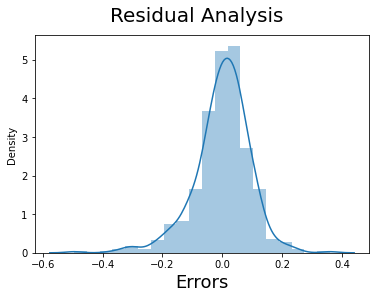

In [66]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Residual Analysis', fontsize = 20)                  
plt.xlabel('Errors', fontsize = 18)

## Summary of Residual Analysis
- Residual is normally distributed with mean as 0 and this meets the Linear Regression assumptions.

Text(0, 0.5, 'y_train_pred')

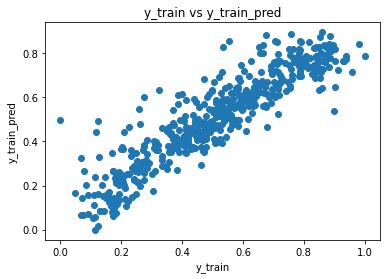

In [67]:
# Model Evaluation with bike_train dataset

plt.scatter(y_train, y_train_pred)

plt.title('y_train vs y_train_pred')
plt.xlabel('y_train')  
plt.ylabel('y_train_pred')

##  Prediction using Final Model.

In [68]:
# Apply the scaling on the bike_test - test Dataset for numerical variables

num_vars = ['temp', 'hum','windspeed', 'cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

df_test.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Spring,Summer,Winter,...,Sep,Clear,Misty,Wet,mon,sat,sun,thu,tue,wed
184,0,1,0,0.831783,0.657364,0.084219,0.692706,0,0,0,...,0,0,1,0,0,0,0,0,0,1
535,1,0,1,0.901354,0.610133,0.153728,0.712034,0,1,0,...,0,1,0,0,0,0,0,1,0,0
299,0,0,0,0.511964,0.837699,0.334206,0.303382,0,0,1,...,0,0,1,0,0,1,0,0,0,0
221,0,0,1,0.881625,0.437098,0.339570,0.547400,0,0,0,...,0,1,0,0,0,0,0,0,0,0
152,0,0,0,0.817246,0.314298,0.537414,0.569029,0,1,0,...,0,1,0,0,0,1,0,0,0,0


In [69]:
# Create y_test and X_test - X and y variables

y_test = df_test.pop('cnt')
X_test = df_test

In [71]:
# Creating X_test to include the final list of variables used for Train set which was generated from RFE and pruned later to
# optimise the model.

test_col = X_train_new.columns

# Exclude the const variable do used [1:]
X_test_rfe = X_test[test_col[1:]]
X_test_sm = sm.add_constant(X_test_rfe)


In [72]:
# Making the predictions using the final model

y_test_pred = lm1.predict(X_test_sm)

Text(0, 0.5, 'y_test_pred')

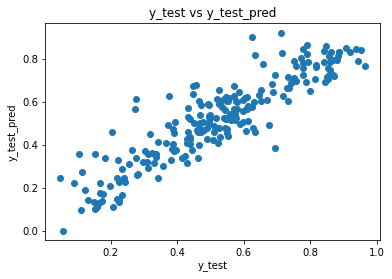

In [73]:
# Model Evaluation with bike_test dataset

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
plt.title('y_test vs y_test_pred')
plt.xlabel('y_test')
plt.ylabel('y_test_pred')

## R^2 Score of Test dataframe

In [74]:
from sklearn.metrics import r2_score
r2_score(y_true = y_test, y_pred = y_test_pred)

0.8101879316563398

## Adjusted R^2 Score of the Test dataframe

In [78]:
#Adjusted R^2 for test data
# n is number of rows in X
n = X_test_sm.shape[0]
p = X_test_sm.shape[1]
r2 = r2_score(y_true = y_test, y_pred = y_test_pred)
adjusted_r2_score = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2_score

0.7991309179664179

## R^2 Score of the train dataframe - 0.825
## Adjusted R^2 Score of the train dataframe - 0.821

# Final Model :-


- We can see that the equation of our best fitted line is:

### 𝑐𝑛𝑡=0.2522+(𝑦𝑟∗0.2331)+(ℎ𝑜𝑙𝑖𝑑𝑎𝑦∗(−0.0924))+(𝑡𝑒𝑚𝑝∗0.5423)+(hum∗(−0.2190))+(windspeed∗(−0.2113))+(spring∗(−0.0503))+(Summer∗(0.0562))+(Winter∗(0.0969))+(Jul∗(-0.0633))+(Sep*(0.0814))+(𝐶𝑙𝑒𝑎𝑟*(0.0602))

# Conclusion

- Some important variables which have positive impact on the demand of bikes:-
    1. yr
    2. temp
    3. Summer
    4. Winter
    5. Sep
    6. Clear